In [1]:
import hashlib
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
def parse_files(root_path):
    files = root_path.joinpath("./outputs-reuben-lag-5").glob("*.json")
    f1_results = []
    per_problem_results = []

    for file in files:

        file_data = json.loads(file.read_text())
        if not 'hyperparameters' in file_data:
            continue

        original_target = root_path.joinpath(file_data["original_target"])
        original_dict = json.loads(Path(original_target).read_text())

        f1_scores = file_data['f1_scores']

        hash_dict = lambda d: hashlib.sha256(json.dumps(d, sort_keys=True).encode()).hexdigest()

        for problem in file_data['per_problem'].keys():
            perf_per_fold = file_data['per_problem'][problem]
            for fold_performance in perf_per_fold:
                perf_per_fold = {**fold_performance, **original_dict, 'problem': problem,
                                 'hyperparameters': file_data['hyperparameters'],
                                 'hyperparameter_hash': hash_dict(file_data['hyperparameters'])}
                per_problem_results += [perf_per_fold]

        for fold, score in enumerate(f1_scores):
            results_dict = {
                "f1": score,
                "fold": fold,
                'hyperparameters': file_data['hyperparameters'],
                'hyperparameter_hash': hash_dict(file_data['hyperparameters'])
            }

            results_dict = {**results_dict, **original_dict}

            f1_results.append(results_dict)

    results_df = pd.DataFrame(f1_results)
    per_problem_df = pd.DataFrame(per_problem_results)
    # print(per_problem_df)

    return results_df, per_problem_df


In [3]:
data, per_problem = parse_files(Path('./analysis'))

In [4]:
data

,f1,fold,hyperparameters,hyperparameter_hash,percentage,use_gradient,use_ewma,model,k_fold,preprocessing
0,0.533333,0,{'C': 0.1},580addbb60c27d5664455e4973623622b0ceed2430a0e7...,14,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
1,0.576271,1,{'C': 0.1},580addbb60c27d5664455e4973623622b0ceed2430a0e7...,14,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
2,0.412698,2,{'C': 0.1},580addbb60c27d5664455e4973623622b0ceed2430a0e7...,14,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
3,0.485714,3,{'C': 0.1},580addbb60c27d5664455e4973623622b0ceed2430a0e7...,14,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
4,0.538462,4,{'C': 0.1},580addbb60c27d5664455e4973623622b0ceed2430a0e7...,14,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
...,...,...,...,...,...,...,...,...,...,...
33535,0.536585,5,"{'hidden_layer_sizes': [20], 'alpha': 0.0001}",1efd61ee306316567d135b6721a987cf5cc990eb161444...,14,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
33536,0.577778,6,"{'hidden_layer_sizes': [20], 'alpha': 0.0001}",1efd61ee306316567d135b6721a987cf5cc990eb161444...,14,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
33537,0.473684,7,"{'hidden_layer_sizes': [20], 'alpha': 0.0001}",1efd61ee306316567d135b6721a987cf5cc990eb161444...,14,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
33538,0.512821,8,"{'hidden_layer_sizes': [20], 'alpha': 0.0001}",1efd61ee306316567d135b6721a987cf5cc990eb161444...,14,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"


In [5]:
per_problem

,length,percentage,correct,use_gradient,use_ewma,model,k_fold,preprocessing,hyperparameters,problem,hyperparameter_hash
0,1,14,1.0,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}",{'C': 0.1},parity-learning.mzn,580addbb60c27d5664455e4973623622b0ceed2430a0e7...
1,1,14,1.0,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}",{'C': 0.1},parity-learning.mzn,580addbb60c27d5664455e4973623622b0ceed2430a0e7...
2,2,14,0.5,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}",{'C': 0.1},pattern_set_mining_k1.mzn,580addbb60c27d5664455e4973623622b0ceed2430a0e7...
3,1,14,0.0,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}",{'C': 0.1},pattern_set_mining_k1.mzn,580addbb60c27d5664455e4973623622b0ceed2430a0e7...
4,2,14,0.5,True,False,LR,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}",{'C': 0.1},pattern_set_mining_k1.mzn,580addbb60c27d5664455e4973623622b0ceed2430a0e7...
...,...,...,...,...,...,...,...,...,...,...,...
1883425,1,14,1.0,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}","{'hidden_layer_sizes': [20], 'alpha': 0.0001}",talent_scheduling_alt.mzn,1efd61ee306316567d135b6721a987cf5cc990eb161444...
1883426,1,14,1.0,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}","{'hidden_layer_sizes': [20], 'alpha': 0.0001}",neos-3237086-abava.mzn,1efd61ee306316567d135b6721a987cf5cc990eb161444...
1883427,1,14,1.0,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}","{'hidden_layer_sizes': [20], 'alpha': 0.0001}",square31.mzn,1efd61ee306316567d135b6721a987cf5cc990eb161444...
1883428,1,14,1.0,False,False,MLP,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}","{'hidden_layer_sizes': [20], 'alpha': 0.0001}",rococoC10-001000.mzn,1efd61ee306316567d135b6721a987cf5cc990eb161444...


In [24]:
def select_hyperparameters(df, best=True):
    grouped = df.groupby(['percentage', 'model', 'use_ewma', 'use_gradient', 'hyperparameter_hash'])[
        'f1'].mean().reset_index()
    resulting_f1 = grouped.groupby(['percentage', 'model', 'use_ewma', 'use_gradient'])['f1'].idxmax() if best else \
        grouped.groupby(['percentage', 'model', 'use_ewma', 'use_gradient'])['f1'].idxmin()

    max_f1_rows = grouped.loc[resulting_f1]

    result_df = pd.merge(df, max_f1_rows[['percentage', 'model', 'use_ewma', 'use_gradient', 'hyperparameter_hash']],
                         on=['percentage', 'model', 'use_ewma', 'use_gradient', 'hyperparameter_hash'],
                         how='inner')

    return result_df


best_selected_models = select_hyperparameters(data)
worst_selected_models = select_hyperparameters(data, best=False)

In [25]:
best_selected_models

,f1,fold,hyperparameters,hyperparameter_hash,percentage,use_gradient,use_ewma,model,k_fold,preprocessing
0,0.171429,0,{},44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e...,20,True,True,DUM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
1,0.292683,1,{},44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e...,20,True,True,DUM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
2,0.114286,2,{},44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e...,20,True,True,DUM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
3,0.058824,3,{},44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e...,20,True,True,DUM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
4,0.176471,4,{},44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e...,20,True,True,DUM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
...,...,...,...,...,...,...,...,...,...,...
6235,0.617647,5,"{'C': 10.0, 'kernel': 'rbf'}",818f3ca5205f6de330a11c86e1981f56f916f113a18db5...,13,False,True,SVM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
6236,0.678571,6,"{'C': 10.0, 'kernel': 'rbf'}",818f3ca5205f6de330a11c86e1981f56f916f113a18db5...,13,False,True,SVM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
6237,0.676471,7,"{'C': 10.0, 'kernel': 'rbf'}",818f3ca5205f6de330a11c86e1981f56f916f113a18db5...,13,False,True,SVM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"
6238,0.688525,8,"{'C': 10.0, 'kernel': 'rbf'}",818f3ca5205f6de330a11c86e1981f56f916f113a18db5...,13,False,True,SVM,{'n_splits': 10},"{'scale': True, 'drop_constant_values': True}"


In [26]:
best_selected_models.groupby(['percentage', 'model', 'use_ewma', 'use_gradient'])['hyperparameter_hash'].nunique()
best_selected_models.groupby(['percentage', 'model', 'use_ewma', 'use_gradient'])['hyperparameter_hash'].nunique()

percentage  model     use_ewma  use_gradient
1           AdaBoost  False     False           1
                                True            1
                      True      False           1
                                True            1
            DT        False     False           1
                                               ..
20          RF        True      True            1
            SVM       False     False           1
                                True            1
                      True      False           1
                                True            1
Name: hyperparameter_hash, Length: 624, dtype: int64

# Visualisations

In [17]:
def label_ewma_and_gradients(df):
    def label(ewma, gradient):
        if ewma and gradient:
            return 'Both'
        elif ewma:
            return 'EWMA'
        elif gradient:
            return 'Gradient'
        else:
            return 'Neither'

    df['params_label_ewma_gradient'] = df.apply(lambda x: label(x['use_ewma'], x['use_gradient']), axis=1)
    return df

/tmp/ipykernel_44004/3698265629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['params_label_ewma_gradient'] = df.apply(lambda x: label(x['use_ewma'], x['use_gradient']), axis=1)
/tmp/ipykernel_44004/3698265629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['params_label_ewma_gradient'] = df.apply(lambda x: label(x['use_ewma'], x['use_gradient']), axis=1)


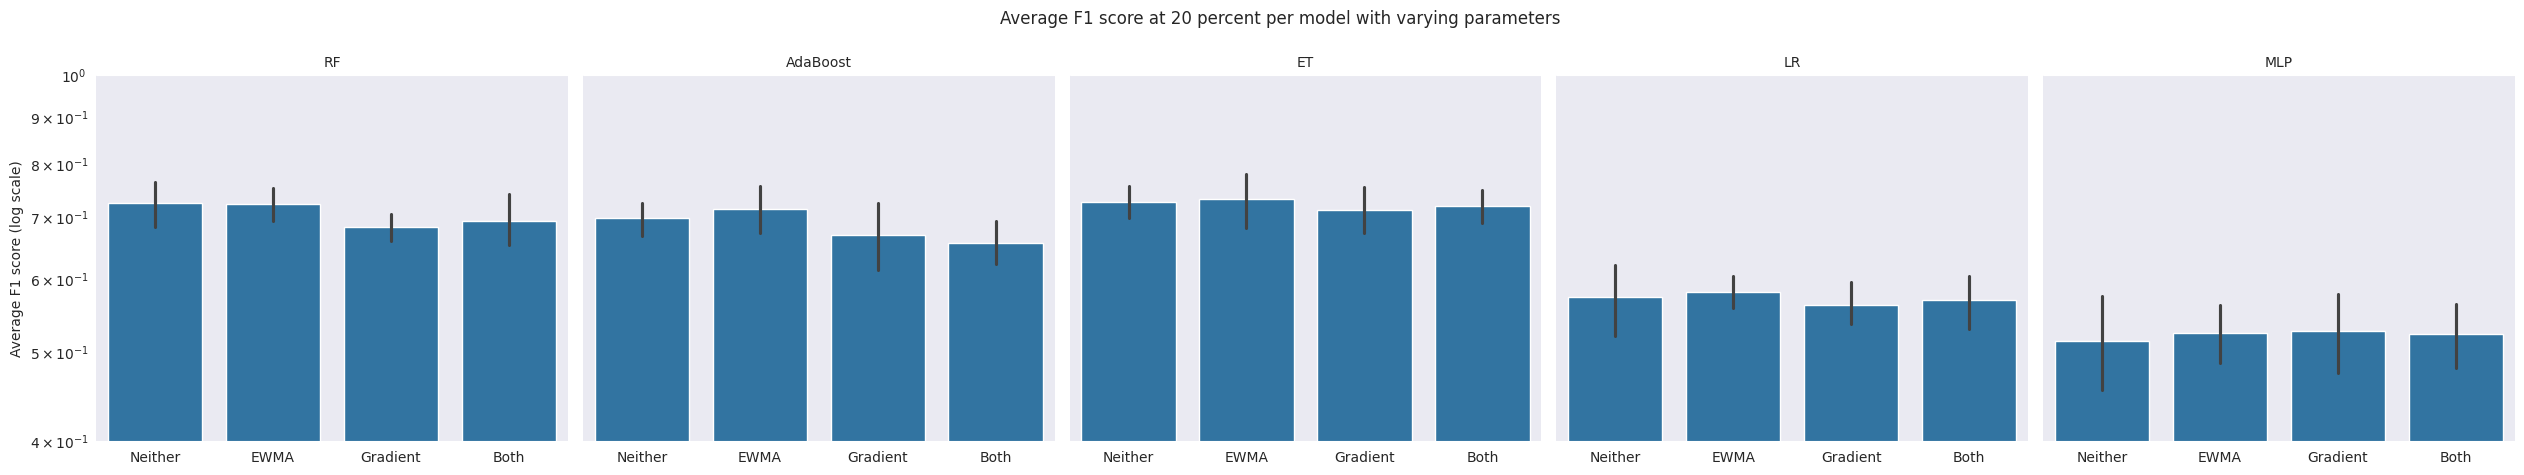

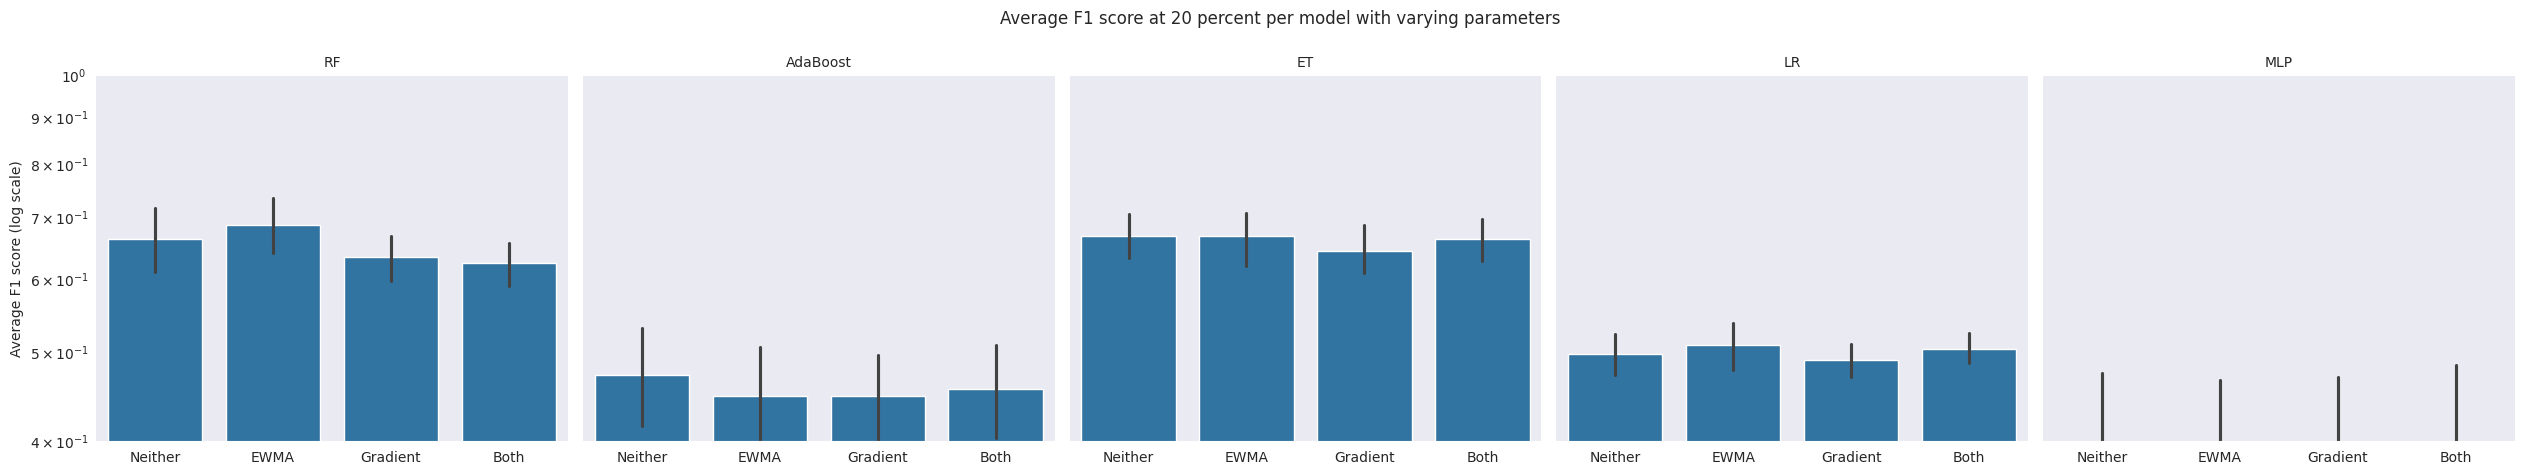

In [38]:
def plot_average_performance_at_x_percent(data_df, x):
    at_x_percent = data_df[data_df['percentage'] == x]
    trees_only = at_x_percent[at_x_percent['model'].isin(['RF', 'AdaBoost', 'ET', 'LR', 'MLP'])]
    labels_added = label_ewma_and_gradients(trees_only)

    # print(trees_only)
    g = seaborn.catplot(data=labels_added, errorbar=('ci', 90), x='params_label_ewma_gradient', y='f1', col='model', col_order=['RF', 'AdaBoost', 'ET', 'LR', 'MLP'],
                        kind='bar', order=['Neither', 'EWMA', 'Gradient', 'Both'])
    for ax in g.axes.flat:
        ax.set(yscale="log")

    plt.ylim(0.4, 1)
    g.set_axis_labels("", "Average F1 score (log scale)")
    g.set_titles("{col_name}")
    g.despine(left=True)

    plt.suptitle(f"Average F1 score at {x} percent per model with varying parameters")
    plt.subplots_adjust(top=0.85)

    # Show the plot


plot_average_performance_at_x_percent(best_selected_models, 20)
plot_average_performance_at_x_percent(worst_selected_models, 20)
plt.show()

/tmp/ipykernel_44004/3698265629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['params_label_ewma_gradient'] = df.apply(lambda x: label(x['use_ewma'], x['use_gradient']), axis=1)
/tmp/ipykernel_44004/3698265629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['params_label_ewma_gradient'] = df.apply(lambda x: label(x['use_ewma'], x['use_gradient']), axis=1)


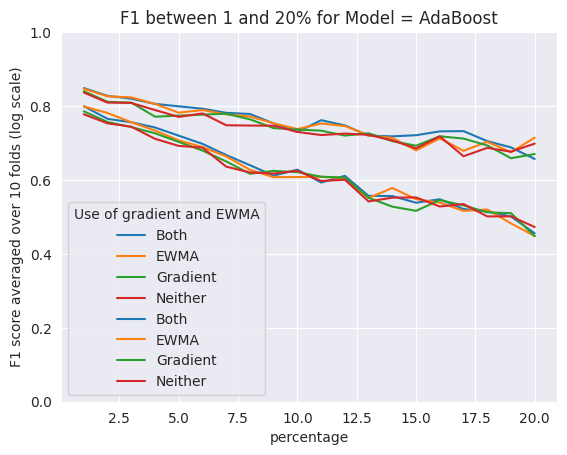

In [34]:
def plot_average_performance_between_percentages_inclusive(data_df, model, min_p, max_p):
    model_only = data_df[data_df['model'] == model]

    hues = ['Both', 'EWMA', 'Gradient', 'Neither']

    labels_added = label_ewma_and_gradients(model_only)
    labels_added = labels_added[
        labels_added['params_label_ewma_gradient'].isin(hues)]

    seaborn.lineplot(data=labels_added, x='percentage', y='f1', hue='params_label_ewma_gradient', errorbar=None,
                     hue_order=hues).set(
        title=f"F1 between {min_p} and {max_p}% for Model = {model}",
        ylabel="F1 score averaged over 10 folds (log scale)")
    plt.legend(title='Use of gradient and EWMA', loc='lower left')

    plt.ylim(0, 1)


def plot_best_and_worst(best, worst, model):
    plot_average_performance_between_percentages_inclusive(best, model, 1, 20)
    plot_average_performance_between_percentages_inclusive(worst, model, 1, 20)
    plt.show()

plot_best_and_worst(best_selected_models, worst_selected_models, 'AdaBoost')
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'ET', 1, 20)
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'MLP', 1, 20)
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'DUM', 1, 20)
# 
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'AdaBoost', 1, 20)
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'ET', 1, 20)
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'MLP', 1, 20)
# plot_average_performance_between_percentages_inclusive(best_selected_models, 'DUM', 1, 20)


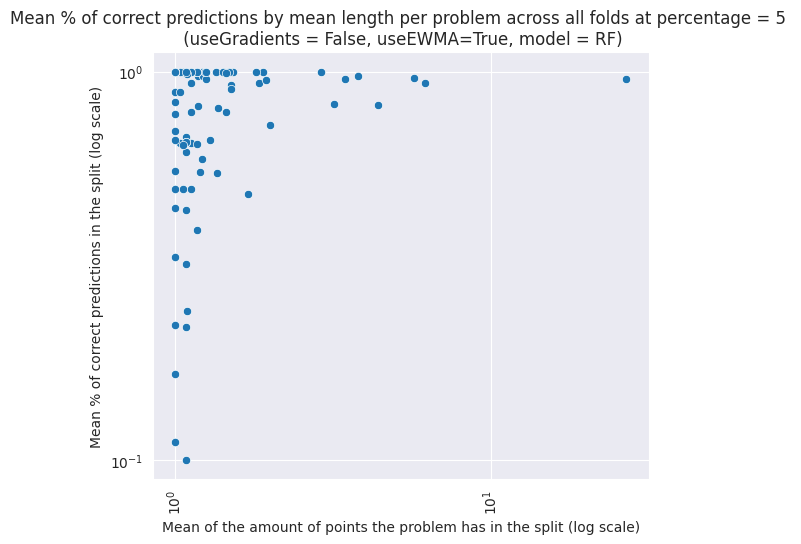

In [41]:
def scatterplot_length_vs_correct_per_problem(data_df, model, use_ewma, use_gradient):
    x = 5
    model_only = data_df[
        (data_df['percentage'] == x) & (data_df['model'] == model) & (data_df['use_ewma'] == use_ewma) & (
                data_df['use_gradient'] == use_gradient)]
    d = model_only.groupby(['problem'])[['length', 'correct']].mean()

    ax = seaborn.scatterplot(d, x='length', y='correct').set(
        title=f"Mean % of correct predictions by mean length per problem across all folds at percentage = {x} \n (useGradients = {use_gradient}, useEWMA={use_ewma}, model = {model})",
        ylabel="Mean % of correct predictions in the split (log scale)",
        xscale='log',
        yscale='log',
        xlabel="Mean of the amount of points the problem has in the split (log scale)")

    plt.xticks(rotation=90)

    plt.subplots_adjust(top=1)
    plt.show()


scatterplot_length_vs_correct_per_problem(per_problem, 'RF', True, False)

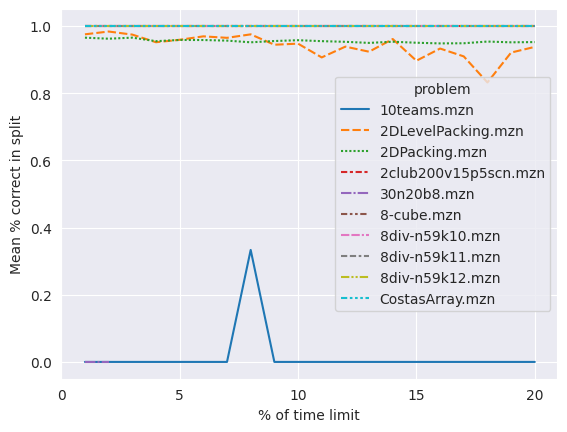

In [21]:
def line_graph_problem_vs_percentage(df, model, use_ewma, use_gradient):
    model_only = df[(df['model'] == model) & (df['use_ewma'] == use_ewma) & (df['use_gradient'] == use_gradient)]
    # Assuming you have the pivot table named 'pivot_table'
    pivot_table = model_only.pivot_table(index='percentage', columns='problem', values='correct', aggfunc='mean').iloc[
                  :, 0:10]

    ax = seaborn.lineplot(data=pivot_table, legend=True).set(
        ylabel="Mean % correct in split",
        xlabel="% of time limit",
        xticks=list(range(0, 21, 5))
    )

    # Show the plot
    plt.show()


# print(pivot_table)


#
# plt.xticks(rotation=90)
# plt.subplots_adjust(top=1)
# plt.show()
#


line_graph_problem_vs_percentage(per_problem, 'RF', False, False)